In [1]:
import stac
import datetime
import numpy as np
import xarray as xr
from rasterio.windows import Window
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from eocube import DataCube, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"

In [2]:
eocube_service = DataCube()

In [3]:
# bbox = [-56.5009689, -10.7164420, -56.3526535, -10.8238641] # Mato Grosso
bbox = [-46.01348876953125, -23.08478515994374, -45.703125, -23.34856015148709] # Interior de SP São José

items = eocube_service.getItems(
    collections=["CB4_64_16D_STK-1"],
    bbox=bbox,
    start_date="2018-08-01",
    end_date="2019-07-31"
)

In [4]:
print(items[0]['assets']['BAND13']['href'])

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/022027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_022027_2019-07-28_2019-08-12_BAND13.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV


In [5]:
eocube_service.createCube()

True

In [6]:
eocube_service.getCubeByBand('red')

ValueError: coords is not dict-like, but it has 1 items, which does not match the 3 dimensions of the data

In [7]:
raster = None
for image in eocube_service.getCube():
    if '2019-07-28T00:00:00' == image.item.get("properties").get("datetime"):
        raster = image
raster

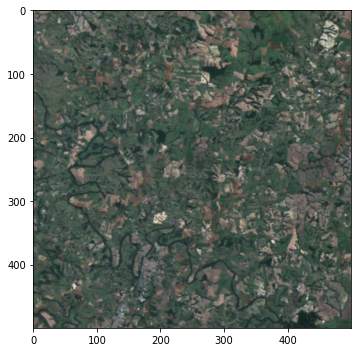

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(raster.getRGB())
plt.tight_layout()

plt.show()

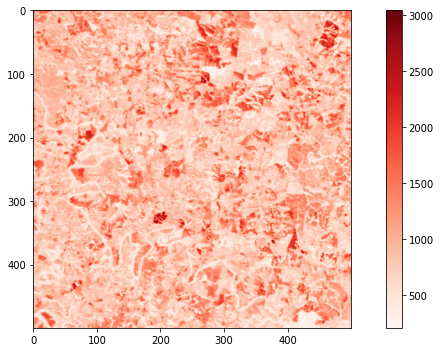

In [9]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(
    raster.getBand("red"),
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

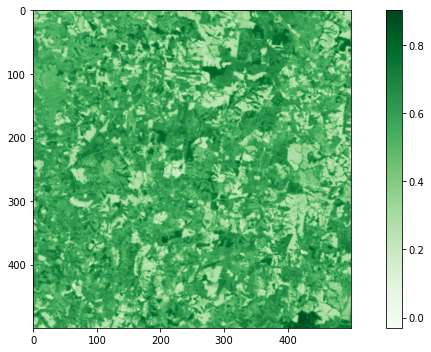

In [15]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(
    raster.getNDVI(),
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

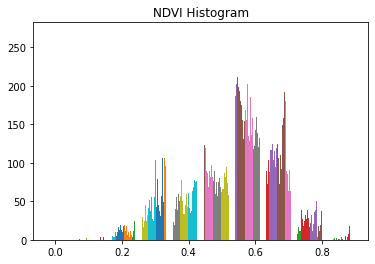

In [11]:
plt.title("NDVI Histogram")
plt.hist(raster.getNDVI())
plt.show()